# Assignment 1
### Benjamin Tollison
### To-Do
- [x] Create all the equally spaced nodes
  - [x]  dx,dy apart depending on the mesh size
  - [x]  plot the intial mesh
- [x] Create the connectivity matrix 
  - [x] checker for duplicates
  - [x] dont add duplicates
- [ ] Create the Applied Force Matrix
- [ ] fix all the nodes on the left with reaction forces
- [ ] Solve for the Force densities and Reaction Matrix
### Try to accomplish this with Tensorflow/PyTorch

### Setting up the Problem

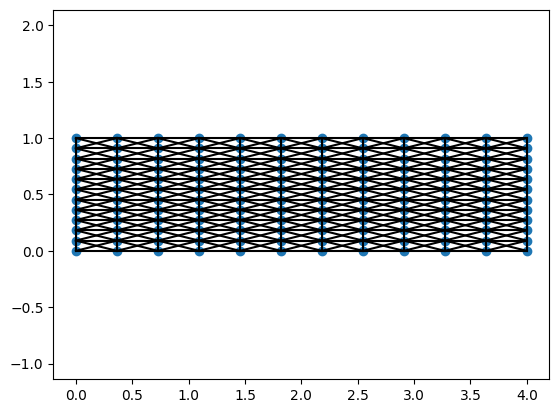

In [86]:
### Benjamin Tollison ###
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

def PlotSturcture(N,C):
    m,n = C.shape
    for i in range(m):
        ii = np.nonzero(C[i])
        plt.plot(N[0,ii][0],N[1,ii][0],'k')
        plt.axis('equal')
def DistanceChecker(x1,y1,x2,y2):
  x_coords = np.linspace(0, length, int(np.sqrt(number_of_nodes)))
  y_coords = np.linspace(0, height, int(np.sqrt(number_of_nodes)))
  dx,dy = abs(x_coords[1]),abs(y_coords[1])
  distance_between_x = abs(x1 - x2)
  distance_between_y = abs(y1 - y2)
  if distance_between_x < dx + dx/10 and distance_between_y < dy + dy/10:
     return True
  else:
     return False
def is_repeat_pattern(patterns, new_pattern):
    new_tuple = tuple(new_pattern)
    seen_tuples = set(map(tuple, patterns))
    if new_tuple in seen_tuples:
        return True
    else:
        return False
def BuildConnectivityMatrix(number_of_members,number_of_nodes,cooridnate_matrix):
  C = np.zeros((number_of_members,number_of_nodes))
  C_duplicate = []
  member = 0
  for node in range(number_of_nodes-1):
    for other_node in range(1,number_of_nodes):
      predetermined_indices = [node,other_node]  # Indices where you want to put 1s
      duplicate_check_tuple= tuple(1 if i in predetermined_indices else 0 for i in range(number_of_nodes))
      if is_repeat_pattern(C_duplicate,duplicate_check_tuple):
          duplicate_check_bool = False
      else:
          duplicate_check_bool = True
          C_duplicate.append(duplicate_check_tuple)
      node_x1,node_y1 = cooridnate_matrix[0][node], cooridnate_matrix[1][node]
      node_x2,node_y2 = cooridnate_matrix[0][other_node], cooridnate_matrix[1][other_node]
      if other_node != node and DistanceChecker(node_x1,node_y1,node_x2,node_y2) and duplicate_check_bool and member < number_of_members:
        C[member][node], C[member][other_node] = 1, -1
        member += 1
  return C
length = 4
height = 1
number_of_nodes = 12**2
number_of_nodes = int(np.sqrt(number_of_nodes))**2 # mesh gets rounded to nearest perfect square
x_coords = np.linspace(0, length, int(np.sqrt(number_of_nodes)))
y_coords = np.linspace(0, height, int(np.sqrt(number_of_nodes)))
X, Y = np.meshgrid(x_coords, y_coords)
N = np.vstack((X.ravel(), Y.ravel(), np.zeros(X.size)))
b_i = np.array([i for i in range(number_of_nodes)])
s_i = b_i
# Geometry work for number of members done on hand paper. I will include my geometrical proof at the end
number_of_members = int(6 + 5*(np.sqrt(number_of_nodes)-2) + (np.sqrt(number_of_nodes)-2)*(5+4*(np.sqrt(number_of_nodes)-2)))
C_B = BuildConnectivityMatrix(number_of_members,number_of_nodes,N)
# C_S = BuildConnectivityMatrix(number_of_members,number_of_nodes,N)
#print(C_B)
plt.scatter(N[0],N[1])
PlotSturcture(N,C_B)